Python Machine Learning 3rd edition by Sebastian Raschka and Vahid Mirjalili
https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

In [1]:
import sys
print(sys.executable)

/opt/anaconda3/envs/drone-methane-venv/bin/python


In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
import numpy as np
from IPython.display import Image

In [3]:
colors = ['#f94144', '#f9c74f', '#277da1']
colors_4 = ['#f94144', '#f9c74f', '#90be6d', '#277da1']

<h2>First Steps with Scikit-learn</h2>

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print("Class labels: ", np.unique(y))

Class labels:  [0 1 2]


<h3>Split Data</h3>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
# random_state = fixed random seed for shuffling datasets
# stratify = returns training and test subsets that have the 
# same proportions of class labels as the input dataset

In [6]:
print("Labels count in y:", np.bincount(y))
print("Labels count in y_train", np.bincount(y_train))
print("Labels count in y_test:", np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train [35 35 35]
Labels count in y_test: [15 15 15]


<h3>Standardize Features</h3>

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<h2>Training a Perceptron via Scikit-learn</h2>

In [8]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [9]:
y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 1


In [10]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Accuracy: {ppn.score(X_test_std, y_test)}')

Accuracy: 0.9777777777777777
Accuracy: 0.9777777777777777


In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02, 
                          test_idx=None,
                          colors=None, markers=None):
    # setup marker generator and color map
    if colors is None:
        colors = ["#000000"]*len(np.unique(y))
    if markers is None:
        all_markers = ['o', '^', 's', 'x', 'v', 'D', 'p', '*', 'h', '+']
        markers = all_markers[:len(np.unique(y))]
    cmap = ListedColormap(colors[:len(np.unique(y))]) # only have 2 classes for this one

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        facecolor='#e63946',
                        edgecolor='#e63946',
                        alpha=0.5,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        facecolor='#e63946',
                        edgecolor='#e63946',
                        alpha=0.5,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


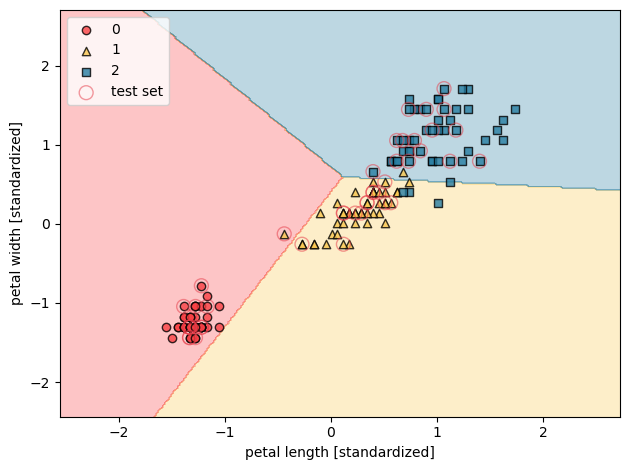

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105, 150), colors=colors)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<h2>Modeling class probabilities via logistic regression</h2>

<h3>Logistic regression intuition and conditional probabilities</h3>

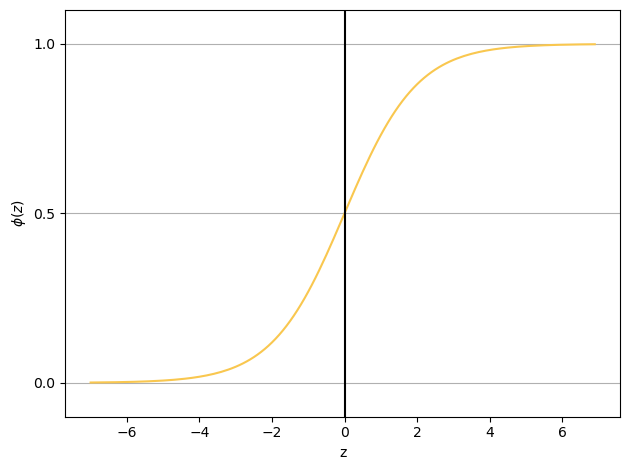

In [13]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z, color=colors[1])
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()

<h3>Learning the weighs of the logisitic cost function</h3>

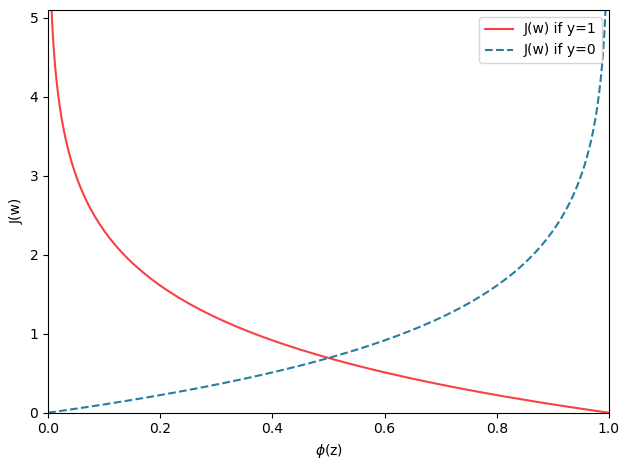

In [14]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1', color=colors[0])

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0',
        color=colors[2])

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

The cost approaches 0 (continuous line) if we correctly predict an example belongs to class 1. The cost approaches 0 if we correctly predict y = 0 (dashed line). However, if the prediction is wrong, the cost goes toward infinity. We penalize wrong predictions with an increasingly larger cost.

<h3>Converting an Adaline implementation into an algorithm for logisitic regression</h3>

In [15]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples 
          and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) 
            - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return 
        # np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

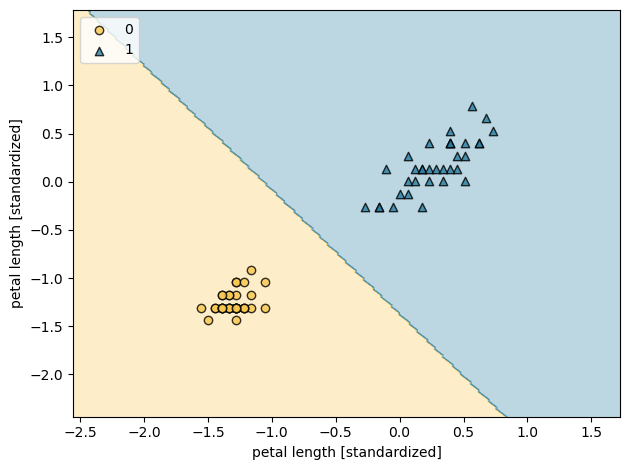

In [16]:
X_train_01_subset = X_train_std[(y_train == 0) 
    | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train ==1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X=X_train_01_subset,
         y=y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd,
                      colors=[colors[1], colors[2]])

plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<h3>Training a logistic regression model with scikit-learn</h3>

/opt/anaconda3/envs/drone-methane-venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


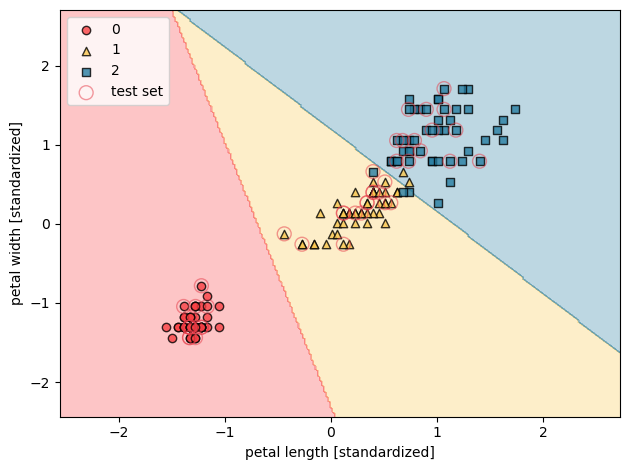

In [17]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', 
                        multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, 
                      test_idx=range(105, 150), colors=colors)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

Note that there exist many different optimization algorithms for solving optimization problems. For minimizing convex loss functions, such as logisitic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD). Scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely "newton-cg", "lbfgs", "liblinear", "sag", and "saga".

The probability that training examples belong to a certain class can be computed using the predict_proba method. For example, we can predict the probabilities of the first three examples in the test dataset:

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [19]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [20]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [21]:
# Call predict method from scikit-learn for more direct classification
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [22]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

<h2>Maximum Margin Classification with Support Vector Machines</h2>

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


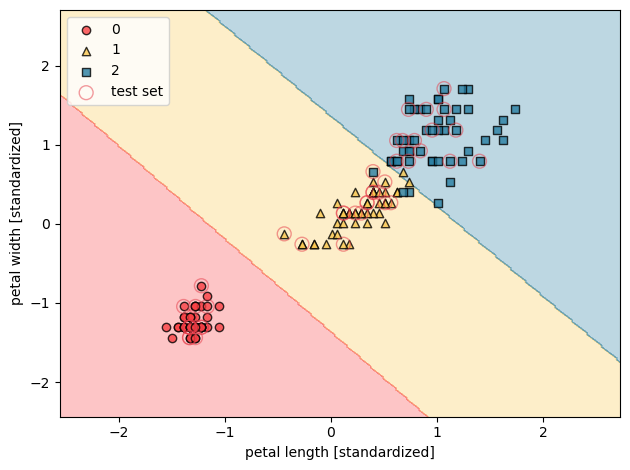

In [23]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150),
                      colors=colors)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<h2>Solving nonlinear problems using a kernel SVM</h2>

Neural networks that can solve linearly inseparable classificaiton problems were a breakthrough in AI. Kernel methods deal with such linearly inseparable data by creating nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function where the data becomes linearly separable.

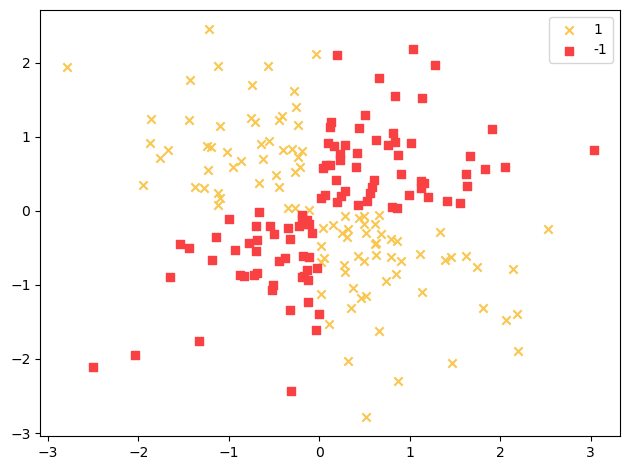

In [24]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] >0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c=colors[1], marker = 'x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c=colors[0], marker='s',
            label='-1')

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

<h3>Using the Kernel Trick to Find Separating Hyperplanes in Higher Dimensional Space</h3>

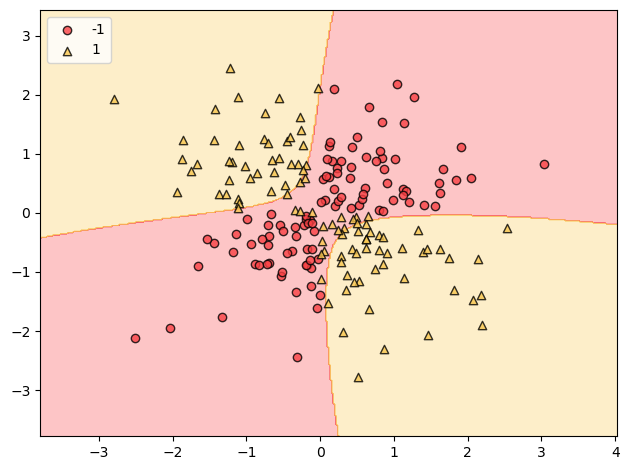

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm, colors=colors)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

Increasing gamma value increases the strength of influence of the training examples, meaning the decision boundary will be tighter. This can be exemplified with the iris dataset:

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


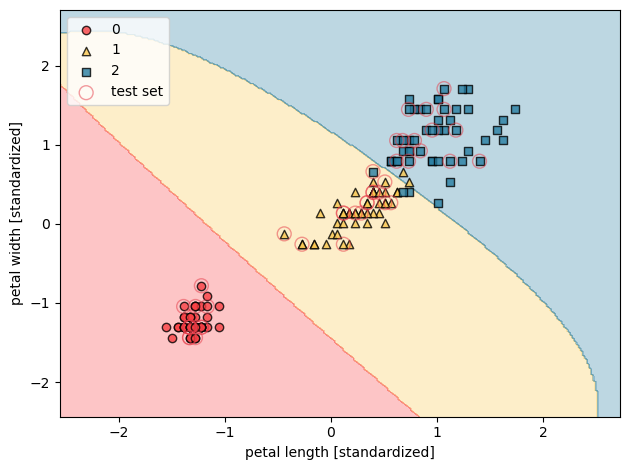

In [26]:
# Small gamma value
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150), colors=colors)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


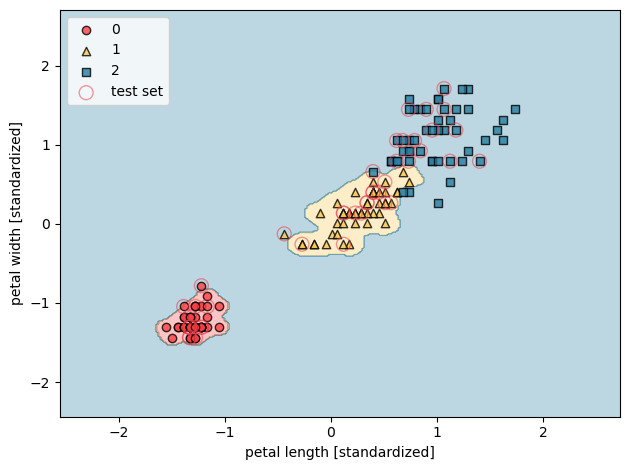

In [27]:
# Large gamma value
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150), colors=colors)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

Even though this model fits the training dataset exceptionally, this classifier will likely have a high generalization error on unseen data. The gamma parameter has an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset

<h2>Decision Tree Learning</h2>

<h3>Maximizing Information Grain</h3>

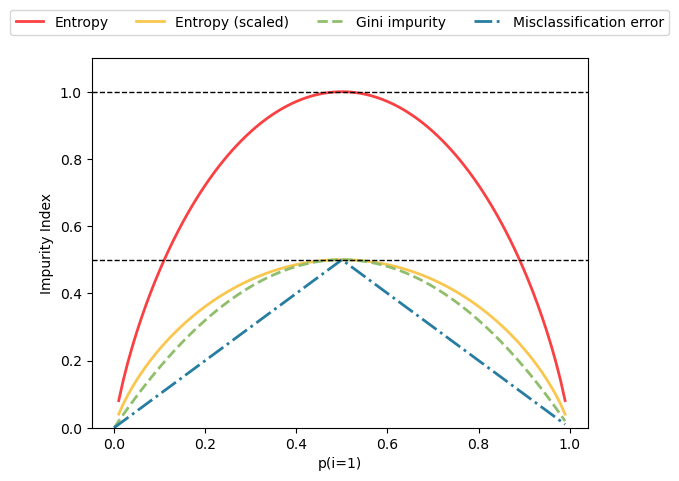

In [29]:
def gini(p): # Gini impurity criterion
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p): # Entropy criterion
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p): # Classification error criterion
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          colors_4):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

plt.show()

Gini Impurity is an intermediate measure between entropy and classification error

<h3>Building a Decision Tree</h3>

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


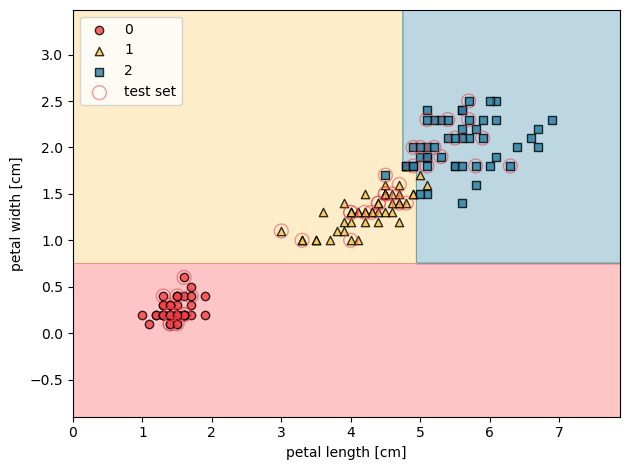

In [30]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150),
                     colors=colors)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

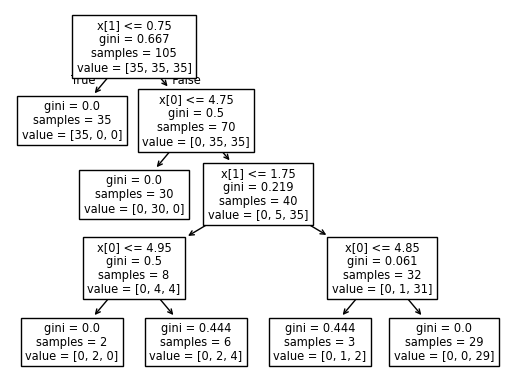

In [31]:
tree.plot_tree(tree_model)

plt.show()

In [32]:
# Download Graphviz www.graphviz.org/download
# brew install graphviz
# and PyDotPlus package

In [33]:
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)

graph.write_png('figs/decision_tree.png')

True

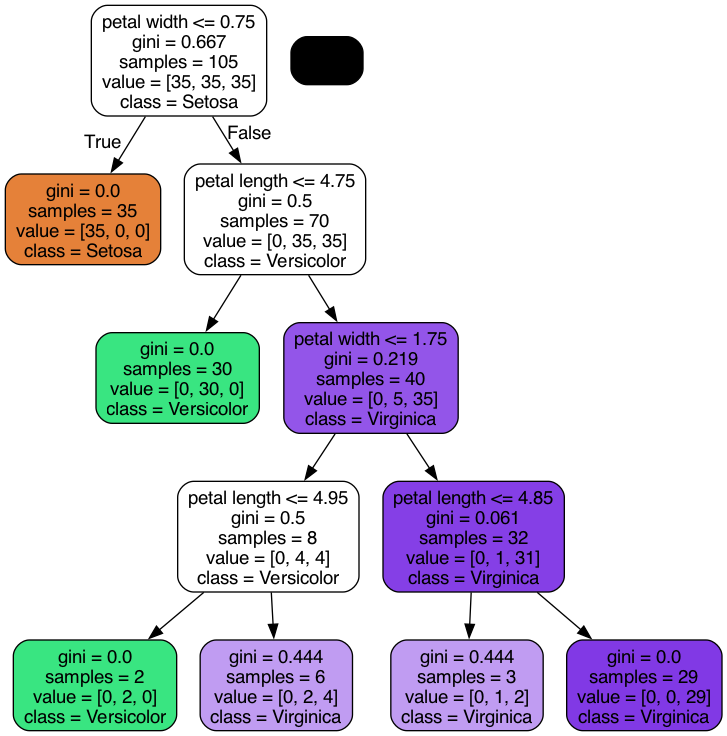

In [34]:
Image(filename='figs/decision_tree.png')

<h3>Combining Weak and Strong Learners in Random Forests</h3>

/var/folders/n1/dcn9v5vn2qs8s12dcvrjdnp00000gn/T/ipykernel_31809/75451412.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


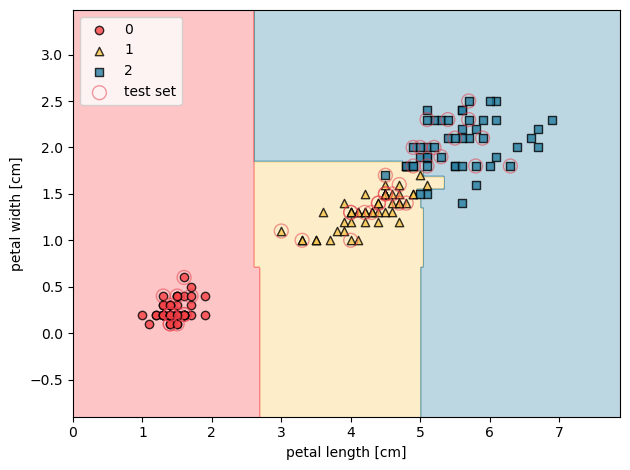

In [35]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25,
                                random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, 
                      test_idx=range(105, 150),
                      colors=colors)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()